In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import sys
import cufflinks
import cufflinks as cf
%matplotlib inline

In [2]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_csv(r"E:\EDA_Car_Features_MSRP.csv")

In [4]:
df

Make       Model  Year                Engine_Fuel_Type  Engine_HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine_Cylinders Transmission_Type      Driven_Wheels  Number_of_Doors  \
0                   6.0            MANUAL   rear wheel drive              2.0   
1                   6.0            MANUAL   rear wheel drive              2.0   
2                   6.0            MANUAL   rear wheel drive              2.0   
3                   6.0            MANUAL   rear wheel drive              2.0   
4                   6.0            MANUAL   rear wheel drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                             Market_Category Vehicle_Size  Vehicle_Style  \
0      Factory Tuner,Luxury,High-Performance      Compact          Coupe   
1                         Luxury,Performance      Compact    Convertible   
2                    Luxury,High-Performance      Compact          Coupe   
3                         Luxury,Performance      Compact          Coupe   
4                                     Luxury      Compact    Convertible   
...                                      ...          ...            ...   
11909             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11910             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11911             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11912             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11913                                 Luxury      Midsize          Sedan   

       highway_MPG  city_mpg  Popularity   MSRP  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [5]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        3
Engine_HP              69
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_mpg                0
Popularity              0
MSRP                    0
dtype: int64

<Axes: >

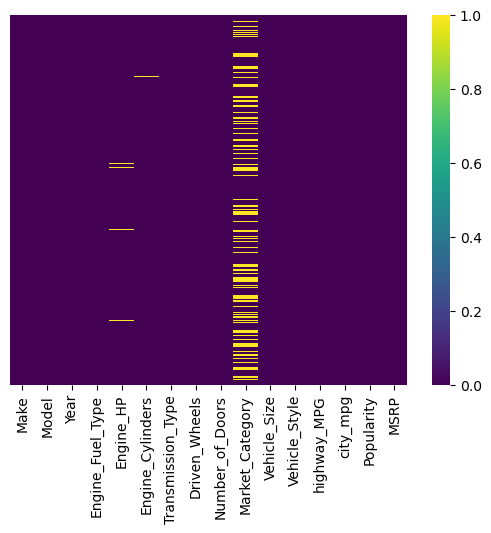

In [6]:
# figsize(12,8)
sns.heatmap(df.isnull(), yticklabels=False, cmap = 'viridis')

In [7]:
df.describe()

Year    Engine_HP  Engine_Cylinders  Number_of_Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway_MPG      city_mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.100000e+04  
50%       26.000000     18.000000   1385.000000  2.999500e+04  
75%       30.000000     22.000000   2009.000000  4.223125e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

In [8]:
df['Engine_HP']=df['Engine_HP'].fillna(df['Engine_HP'].mode())

In [9]:
df['Engine_Cylinders']=df['Engine_Cylinders'].fillna(df['Engine_Cylinders'].mean())

In [10]:
df['Number_of_Doors']=df['Number_of_Doors'].fillna(df['Number_of_Doors'].mean())

In [11]:
df.duplicated().sum()

715

In [12]:
df[df.duplicated()]

Make     Model  Year             Engine_Fuel_Type  Engine_HP  \
14        BMW  1 Series  2013  premium unleaded (required)      230.0   
18       Audi       100  1992             regular unleaded      172.0   
20       Audi       100  1992             regular unleaded      172.0   
24       Audi       100  1993             regular unleaded      172.0   
25       Audi       100  1993             regular unleaded      172.0   
...       ...       ...   ...                          ...        ...   
11481  Suzuki      X-90  1998             regular unleaded       95.0   
11603   Volvo      XC60  2017             regular unleaded      302.0   
11604   Volvo      XC60  2017             regular unleaded      240.0   
11708  Suzuki       XL7  2008             regular unleaded      252.0   
11717  Suzuki       XL7  2008             regular unleaded      252.0   

       Engine_Cylinders Transmission_Type      Driven_Wheels  Number_of_Doors  \
14                  6.0            MANUAL   rear wheel drive              2.0   
18                  6.0            MANUAL  front wheel drive              4.0   
20                  6.0            MANUAL  front wheel drive              4.0   
24                  6.0            MANUAL  front wheel drive              4.0   
25                  6.0            MANUAL  front wheel drive              4.0   
...                 ...               ...                ...              ...   
11481               4.0            MANUAL   four wheel drive              2.0   
11603               4.0         AUTOMATIC    all wheel drive              4.0   
11604               4.0         AUTOMATIC  front wheel drive              4.0   
11708               6.0         AUTOMATIC    all wheel drive              4.0   
11717               6.0         AUTOMATIC  front wheel drive              4.0   

                    Market_Category Vehicle_Size Vehicle_Style  highway_MPG  \
14               Luxury,Performance      Compact         Coupe           28   
18                           Luxury      Midsize         Sedan           24   
20                           Luxury      Midsize         Sedan           24   
24                           Luxury      Midsize         Sedan           24   
25                           Luxury      Midsize         Sedan           24   
...                             ...          ...           ...          ...   
11481                           NaN      Compact       2dr SUV           26   
11603  Crossover,Luxury,Performance      Midsize       4dr SUV           29   
11604              Crossover,Luxury      Midsize       4dr SUV           30   
11708                     Crossover      Midsize       4dr SUV           22   
11717                     Crossover      Midsize       4dr SUV           22   

       city_mpg  Popularity   MSRP  
14           19        3916  31500  
18           17        3105   2000  
20           17        3105   2000  
24           17        3105   2000  
25           17        3105   2000  
...         ...         ...    ...  
11481        22         481   2000  
11603        20         870  46350  
11604        23         870  40950  
11708        15         481  29149  
11717        16         481  27499  

[715 rows x 16 columns]

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine_Fuel_Type   11196 non-null  object 
 4   Engine_HP          11130 non-null  float64
 5   Engine_Cylinders   11199 non-null  float64
 6   Transmission_Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number_of_Doors    11199 non-null  float64
 9   Market_Category    7823 non-null   object 
 10  Vehicle_Size       11199 non-null  object 
 11  Vehicle_Style      11199 non-null  object 
 12  highway_MPG        11199 non-null  int64  
 13  city_mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(5), ob

In [16]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine_Fuel_Type      object
Engine_HP            float64
Engine_Cylinders     float64
Transmission_Type     object
Driven_Wheels         object
Number_of_Doors      float64
Market_Category       object
Vehicle_Size          object
Vehicle_Style         object
highway_MPG            int64
city_mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [17]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [18]:
df.shape

(11199, 16)

In [19]:
df.describe()

Year     Engine_HP  Engine_Cylinders  Number_of_Doors  \
count  11199.000000  11130.000000      11199.000000     11199.000000   
mean    2010.714528    253.388859          5.665851         3.454113   
std        7.228211    110.150938          1.794614         0.872712   
min     1990.000000     55.000000          0.000000         2.000000   
25%     2007.000000    172.000000          4.000000         2.000000   
50%     2015.000000    239.000000          6.000000         4.000000   
75%     2016.000000    303.000000          6.000000         4.000000   
max     2017.000000   1001.000000         16.000000         4.000000   

        highway_MPG      city_mpg    Popularity          MSRP  
count  11199.000000  11199.000000  11199.000000  1.119900e+04  
mean      26.610590     19.731851   1558.483347  4.192593e+04  
std        8.977641      9.177555   1445.668872  6.153505e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.159950e+04  
50%       25.000000     18.000000   1385.000000  3.067500e+04  
75%       30.000000     22.000000   2009.000000  4.303250e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

In [20]:
df.Engine_HP.min()

55.0

In [21]:
df.Engine_HP.max()

1001.0

In [22]:
df.Engine_Cylinders.min()

0.0

In [23]:
df.Engine_Cylinders.max()

16.0

In [24]:
df.Number_of_Doors.min()

2.0

In [25]:
df.Number_of_Doors.max()

4.0

In [26]:
df.highway_MPG.min()

12

In [27]:
df.highway_MPG.max()

354

In [28]:
df.city_mpg.min()

7

In [29]:
df.city_mpg.max()

137

In [30]:
df.Popularity.min()

2

In [31]:
df.Popularity.max()

5657

In [32]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        3
Engine_HP              69
Engine_Cylinders        0
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         0
Market_Category      3376
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [33]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine_Fuel_Type      object
Engine_HP            float64
Engine_Cylinders     float64
Transmission_Type     object
Driven_Wheels         object
Number_of_Doors      float64
Market_Category       object
Vehicle_Size          object
Vehicle_Style         object
highway_MPG            int64
city_mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [34]:
df.Make.unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [35]:
df.Model.unique()

array(['1 Series M', '1 Series', '100', '124 Spider', '190-Class',
       '2 Series', '200', '200SX', '240SX', '240', '2',
       '3 Series Gran Turismo', '3 Series', '300-Class', '3000GT', '300',
       '300M', '300ZX', '323', '350-Class', '350Z', '360', '370Z', '3',
       '4 Series Gran Coupe', '4 Series', '400-Class', '420-Class',
       '456M', '458 Italia', '4C', '4Runner', '5 Series Gran Turismo',
       '5 Series', '500-Class', '500e', '500', '500L', '500X', '550',
       '560-Class', '570S', '575M', '57', '599', '5',
       '6 Series Gran Coupe', '6 Series', '600-Class', '6000',
       '612 Scaglietti', '626', '62', '650S Coupe', '650S Spider', '6',
       '7 Series', '718 Cayman', '740', '760', '780', '8 Series', '80',
       '850', '86', '9-2X', '9-3 Griffin', '09-Mar', '9-4X', '09-May',
       '9-7X', '9000', '900', '90', '911', '928', '929', '940', '944',
       '960', '968', 'A3', 'A4 allroad', 'A4', 'A5', 'A6', 'A7', 'A8',
       'Acadia Limited', 'Acadia', 'Accent', 'Ac

In [36]:
df.Engine_Fuel_Type.unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [37]:
df.Transmission_Type.unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [38]:
df.Driven_Wheels.unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [39]:
df.Market_Category.unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

In [40]:
df.Vehicle_Size.unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [41]:
df.Vehicle_Style.unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [43]:
df['Make']=labelencoder.fit_transform(df['Make'])
df['Model']=labelencoder.fit_transform(df['Model'])
df['Engine_Fuel_Type']=labelencoder.fit_transform(df['Engine_Fuel_Type'])
df['Market_Category']=labelencoder.fit_transform(df['Market_Category'])
df['Vehicle_Style']=labelencoder.fit_transform(df['Vehicle_Style'])

In [44]:
df['Transmission_Type']=df['Transmission_Type'].map({ 'MANUAL': 1,'AUTOMATIC': 2, 'AUTOMATED_MANUAL': 3, 'DIRECT_DRIVE': 4, 'UNKNOWN': 5})
df['Driven_Wheels']=df['Driven_Wheels'].map({ 'rear wheel drive': 1,'front wheel drive': 2, 'all wheel drive': 3, 'four wheel drive': 4})
df['Vehicle_Size']=df['Vehicle_Size'].map({ 'Compact': 1,'Midsize': 2, 'Large': 3})

In [45]:
df.head(3)

Make  Model  Year  Engine_Fuel_Type  Engine_HP  Engine_Cylinders  \
0     4      3  2011                 8      335.0               6.0   
1     4      2  2011                 8      300.0               6.0   
2     4      2  2011                 8      300.0               6.0   

   Transmission_Type  Driven_Wheels  Number_of_Doors  Market_Category  \
0                  1              1              2.0               38   
1                  1              1              2.0               67   
2                  1              1              2.0               64   

   Vehicle_Size  Vehicle_Style  highway_MPG  city_mpg  Popularity   MSRP  
0             1              8           26        19        3916  46135  
1             1              6           28        19        3916  40650  
2             1              8           28        20        3916  36350

In [46]:
df.iplot(x = 'Year', y = 'Popularity', kind = 'bar')

In [47]:
cf.set_config_file(theme='solar')
df.iplot(x = 'Year', y = 'Popularity', mode = 'markers', xTitle = 'Year', yTitle = 'Popularity')

In [48]:
df.iplot(x = 'Year', y = 'Model', z = 'Popularity', kind = 'scatter3d')

In [49]:
df.iplot(x = 'Make', y = 'Popularity', z = 'highway_MPG', kind = 'bubble3d', size = 'Make')

In [50]:
df.head()

Make  Model  Year  Engine_Fuel_Type  Engine_HP  Engine_Cylinders  \
0     4      3  2011                 8      335.0               6.0   
1     4      2  2011                 8      300.0               6.0   
2     4      2  2011                 8      300.0               6.0   
3     4      2  2011                 8      230.0               6.0   
4     4      2  2011                 8      230.0               6.0   

   Transmission_Type  Driven_Wheels  Number_of_Doors  Market_Category  \
0                  1              1              2.0               38   
1                  1              1              2.0               67   
2                  1              1              2.0               64   
3                  1              1              2.0               67   
4                  1              1              2.0               63   

   Vehicle_Size  Vehicle_Style  highway_MPG  city_mpg  Popularity   MSRP  
0             1              8           26        19        3916  46135  
1             1              6           28        19        3916  40650  
2             1              8           28        20        3916  36350  
3             1              8           28        18        3916  29450  
4             1              6           28        18        3916  34500

In [51]:
df.tail()

Make  Model  Year  Engine_Fuel_Type  Engine_HP  Engine_Cylinders  \
11909     0    901  2012                 8      300.0               6.0   
11910     0    901  2012                 8      300.0               6.0   
11911     0    901  2012                 8      300.0               6.0   
11912     0    901  2013                 7      300.0               6.0   
11913    25    902  2006                 9      221.0               6.0   

       Transmission_Type  Driven_Wheels  Number_of_Doors  Market_Category  \
11909                  2              3              4.0               13   
11910                  2              3              4.0               13   
11911                  2              3              4.0               13   
11912                  2              3              4.0               13   
11913                  2              2              4.0               63   

       Vehicle_Size  Vehicle_Style  highway_MPG  city_mpg  Popularity   MSRP  
11909             2              2           23        16         204  46120  
11910             2              2           23        16         204  56670  
11911             2              2           23        16         204  50620  
11912             2              2           23        16         204  50920  
11913             2             14           26        17          61  28995

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  int32  
 1   Model              11199 non-null  int32  
 2   Year               11199 non-null  int64  
 3   Engine_Fuel_Type   11199 non-null  int32  
 4   Engine_HP          11130 non-null  float64
 5   Engine_Cylinders   11199 non-null  float64
 6   Transmission_Type  11199 non-null  int64  
 7   Driven_Wheels      11199 non-null  int64  
 8   Number_of_Doors    11199 non-null  float64
 9   Market_Category    11199 non-null  int32  
 10  Vehicle_Size       11199 non-null  int64  
 11  Vehicle_Style      11199 non-null  int32  
 12  highway_MPG        11199 non-null  int64  
 13  city_mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(3), int32(5), in

In [53]:
df.dtypes

Make                   int32
Model                  int32
Year                   int64
Engine_Fuel_Type       int32
Engine_HP            float64
Engine_Cylinders     float64
Transmission_Type      int64
Driven_Wheels          int64
Number_of_Doors      float64
Market_Category        int32
Vehicle_Size           int64
Vehicle_Style          int32
highway_MPG            int64
city_mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

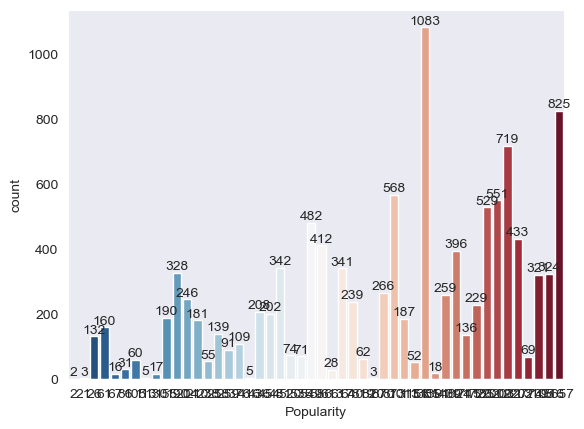

In [76]:
sns.set_style('dark') # sns is for seaborn library, style is dark, you can select other styles - google it
ax = sns.countplot(x = 'Popularity', data=df, palette = 'RdBu_r')
for bars in ax.containers: # counts on top of bar (common for all type of counts)
    ax.bar_label(bars)

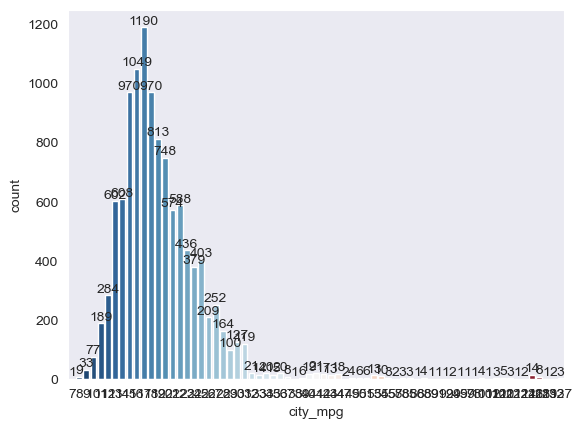

In [55]:
sns.set_style('dark') # sns is for seaborn library, style is dark, you can select other styles - google it
ax = sns.countplot(x = 'city_mpg', data=df, palette = 'RdBu_r')
for bars in ax.containers: # counts on top of bar (common for all type of counts)
    ax.bar_label(bars)

highway_MPG
24     843
23     781
26     750
22     713
25     706
28     657
27     567
30     521
19     497
31     495
21     494
20     478
29     440
17     385
18     364
33     335
32     302
34     274
35     204
16     201
36     196
37     173
38     138
15     117
40     110
39     109
41      65
42      46
14      37
43      21
44      21
46      21
48      16
45      14
13      14
101     11
50      10
105      8
47       7
109      6
99       5
92       5
12       5
53       5
90       4
111      3
102      3
74       3
82       3
100      2
107      2
110      2
103      2
106      2
97       2
98       1
94       1
108      1
354      1
Name: count, dtype: int64

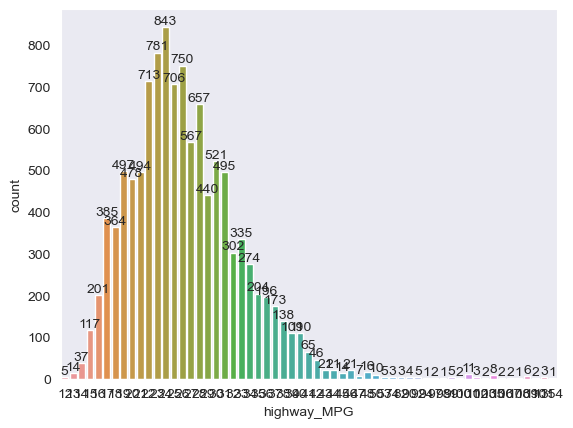

In [56]:
ax=sns.countplot(x= 'highway_MPG', data=df)
for bars in ax.containers: # counts on top of bar (common for all type of counts)
    ax.bar_label(bars)
df['highway_MPG'].value_counts()

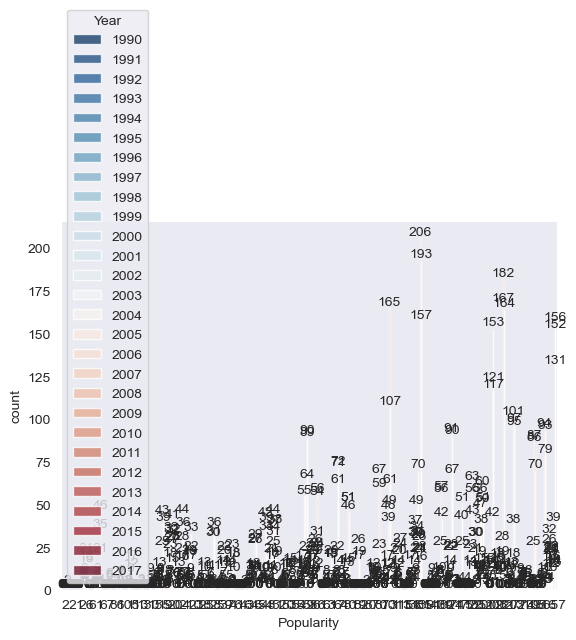

In [57]:
sns.set_style('dark') # sns is for seaborn library, style is dark, you can select other styles - google it
ax = sns.countplot(x = 'Popularity', hue = 'Year', data=df, palette = 'RdBu_r', alpha = 0.8)
for bars in ax.containers: # counts on top of bar (common for all type of counts)
    ax.bar_label(bars)

<Axes: >

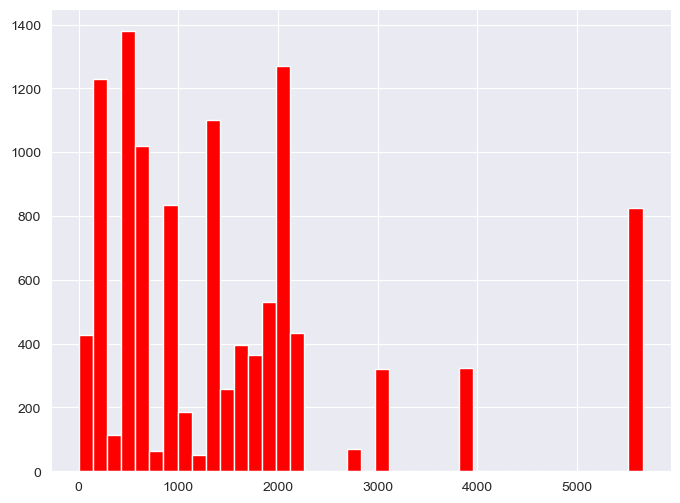

In [58]:
df['Popularity'].hist(color='red', bins=40, figsize=(8,6))

<Axes: xlabel='Transmission_Type', ylabel='Driven_Wheels'>

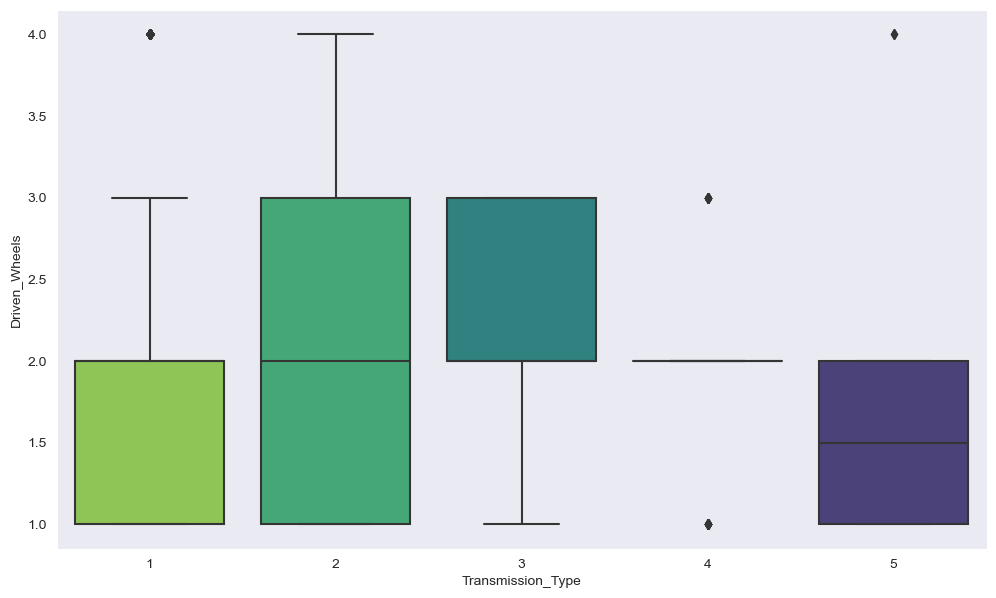

In [59]:
plt.figure(figsize=(12,7))
sns.boxplot(x= 'Transmission_Type', y = 'Driven_Wheels', data = df, palette = 'viridis_r')

D:\ANACONDA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1500x1500 with 0 Axes>

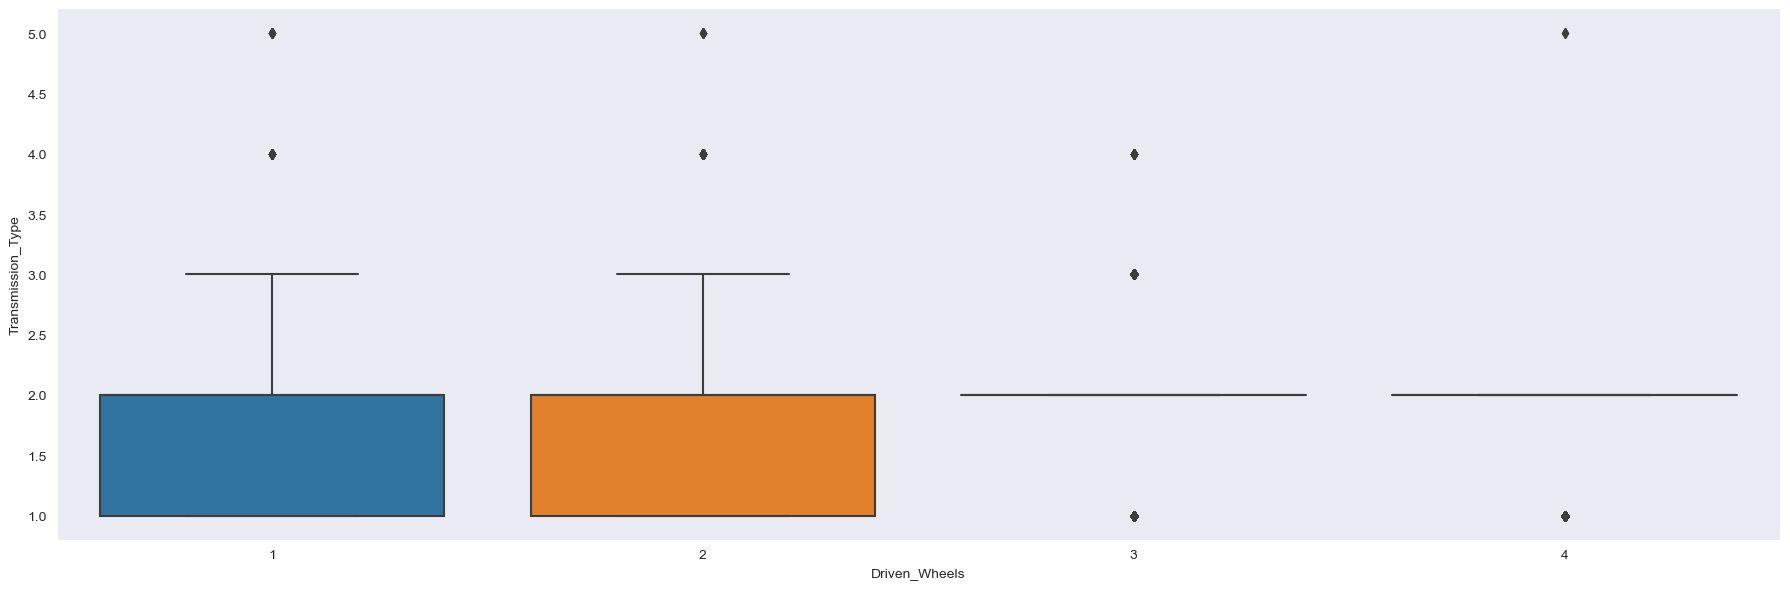

In [60]:
plt.figure(figsize=(15,15))
sns.catplot(y="Transmission_Type", x = "Driven_Wheels", data=df.sort_values("Driven_Wheels", ascending=True), kind= "box", height=6, aspect=3)

D:\ANACONDA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x1200 with 0 Axes>

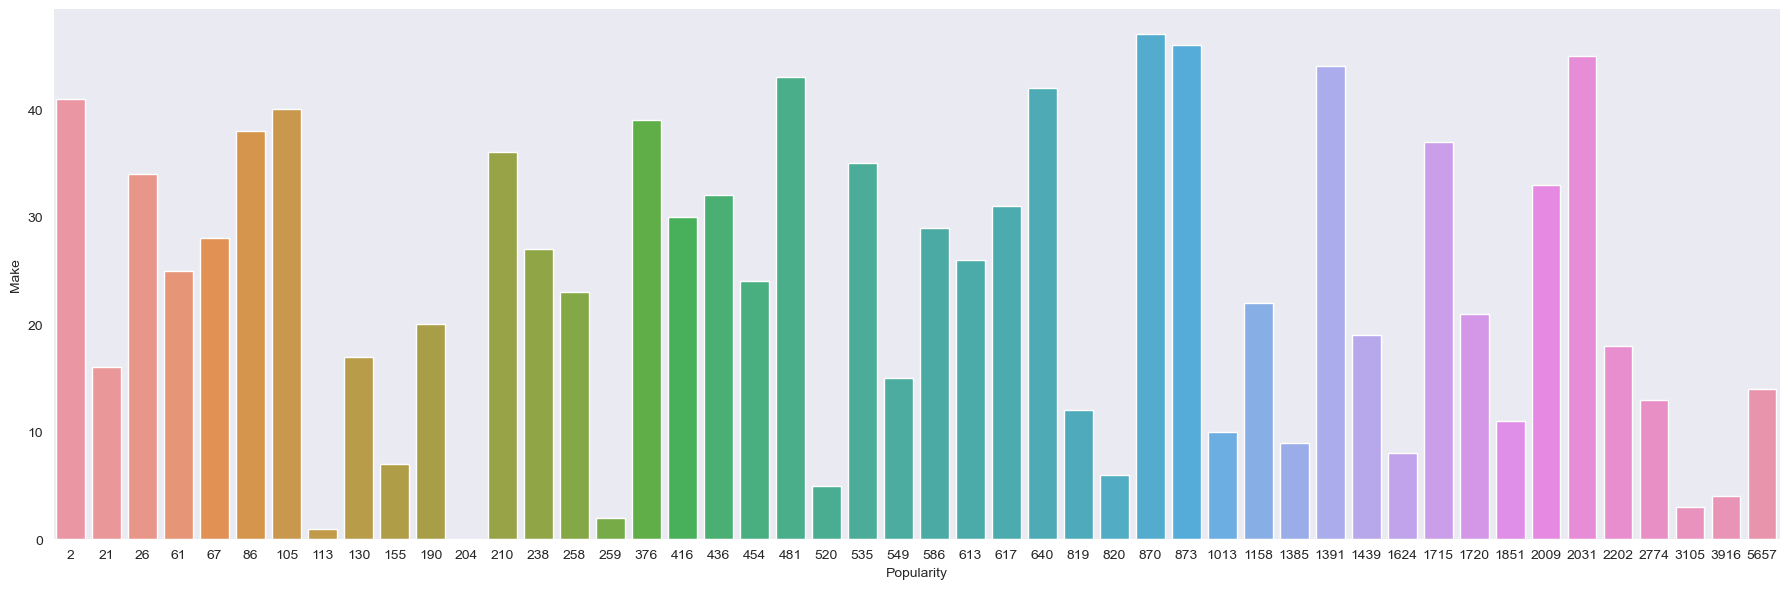

In [61]:
plt.figure(figsize=(12,12))
sns.catplot(y="Make", x = "Popularity", data=df.sort_values("Make", ascending=False), kind= "bar", height=6, aspect=3)

<Axes: >

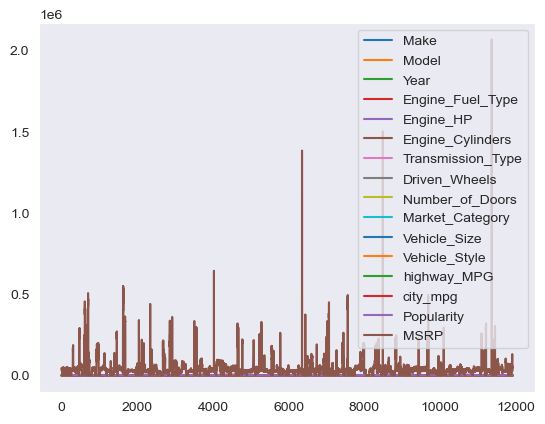

In [62]:
df.plot()

<Axes: >

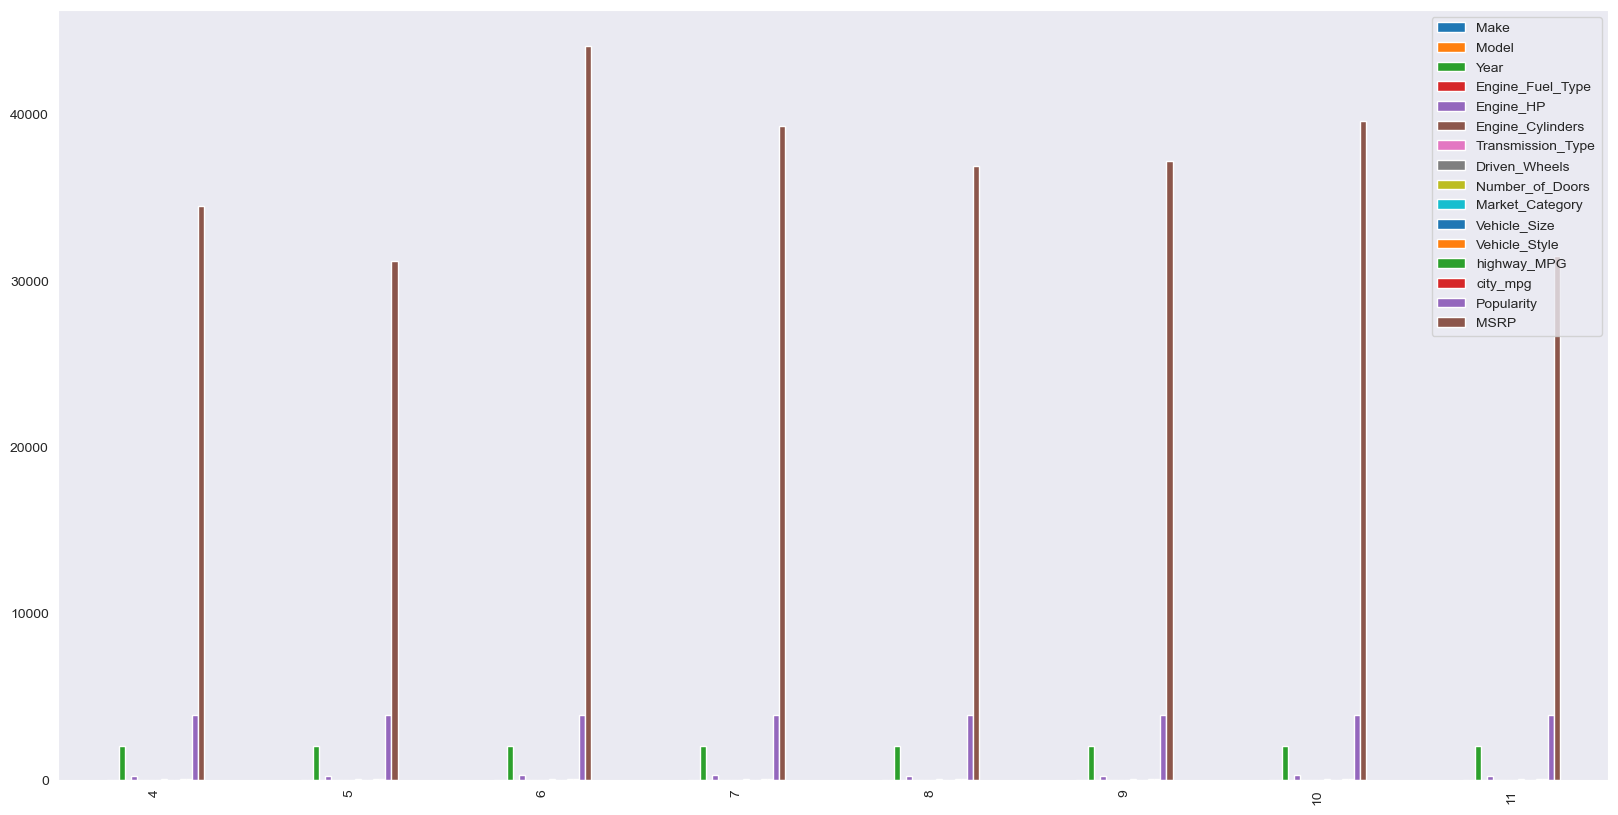

In [63]:
df.iloc[4:12].plot(kind = 'bar', figsize = (20,10))

<Axes: ylabel='Frequency'>

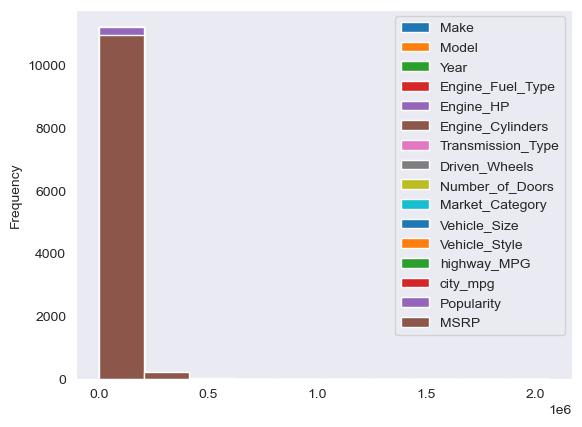

In [64]:
df.plot(kind='hist')

<Axes: ylabel='Frequency'>

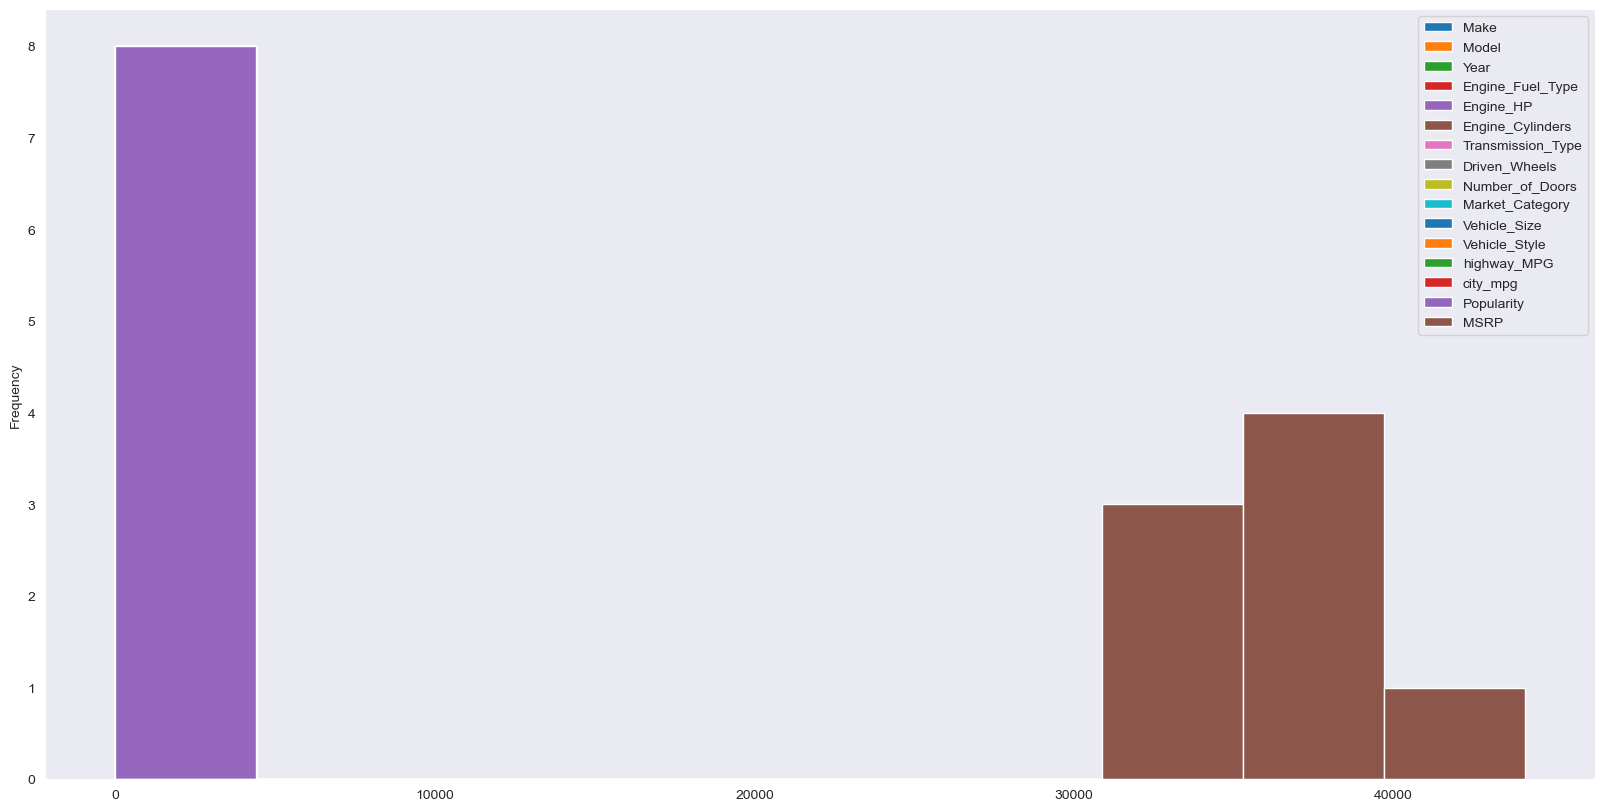

In [65]:
df.iloc[4:12].plot(kind='hist', figsize = (20,10))

<Axes: ylabel='Frequency'>

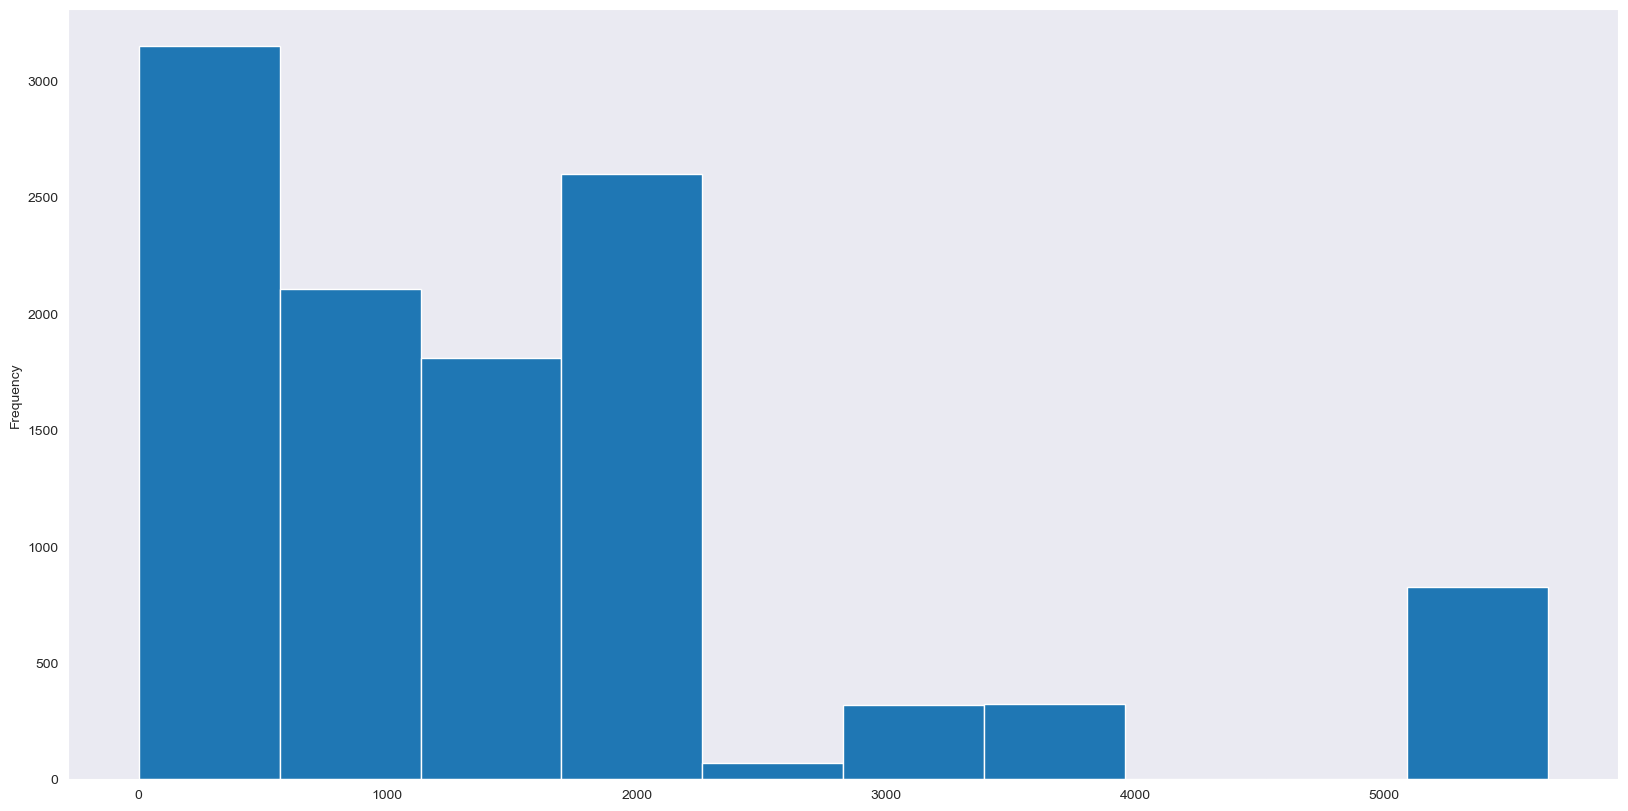

In [66]:
df['Popularity'].plot(kind ='hist', figsize =(20,10))

<Axes: >

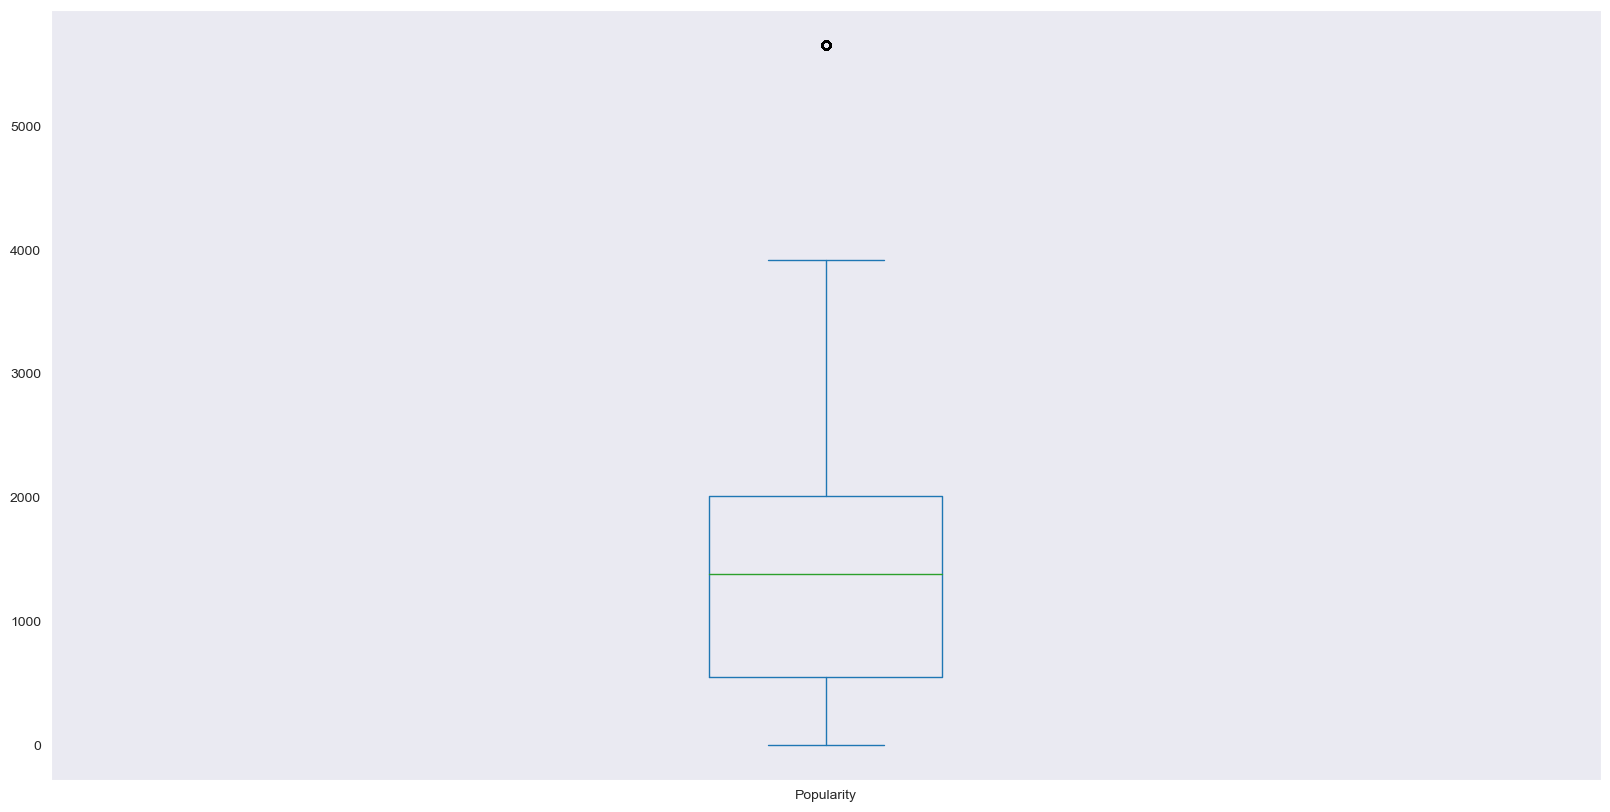

In [67]:
df['Popularity']. plot(kind = 'box', figsize = (20,10))

<Axes: >

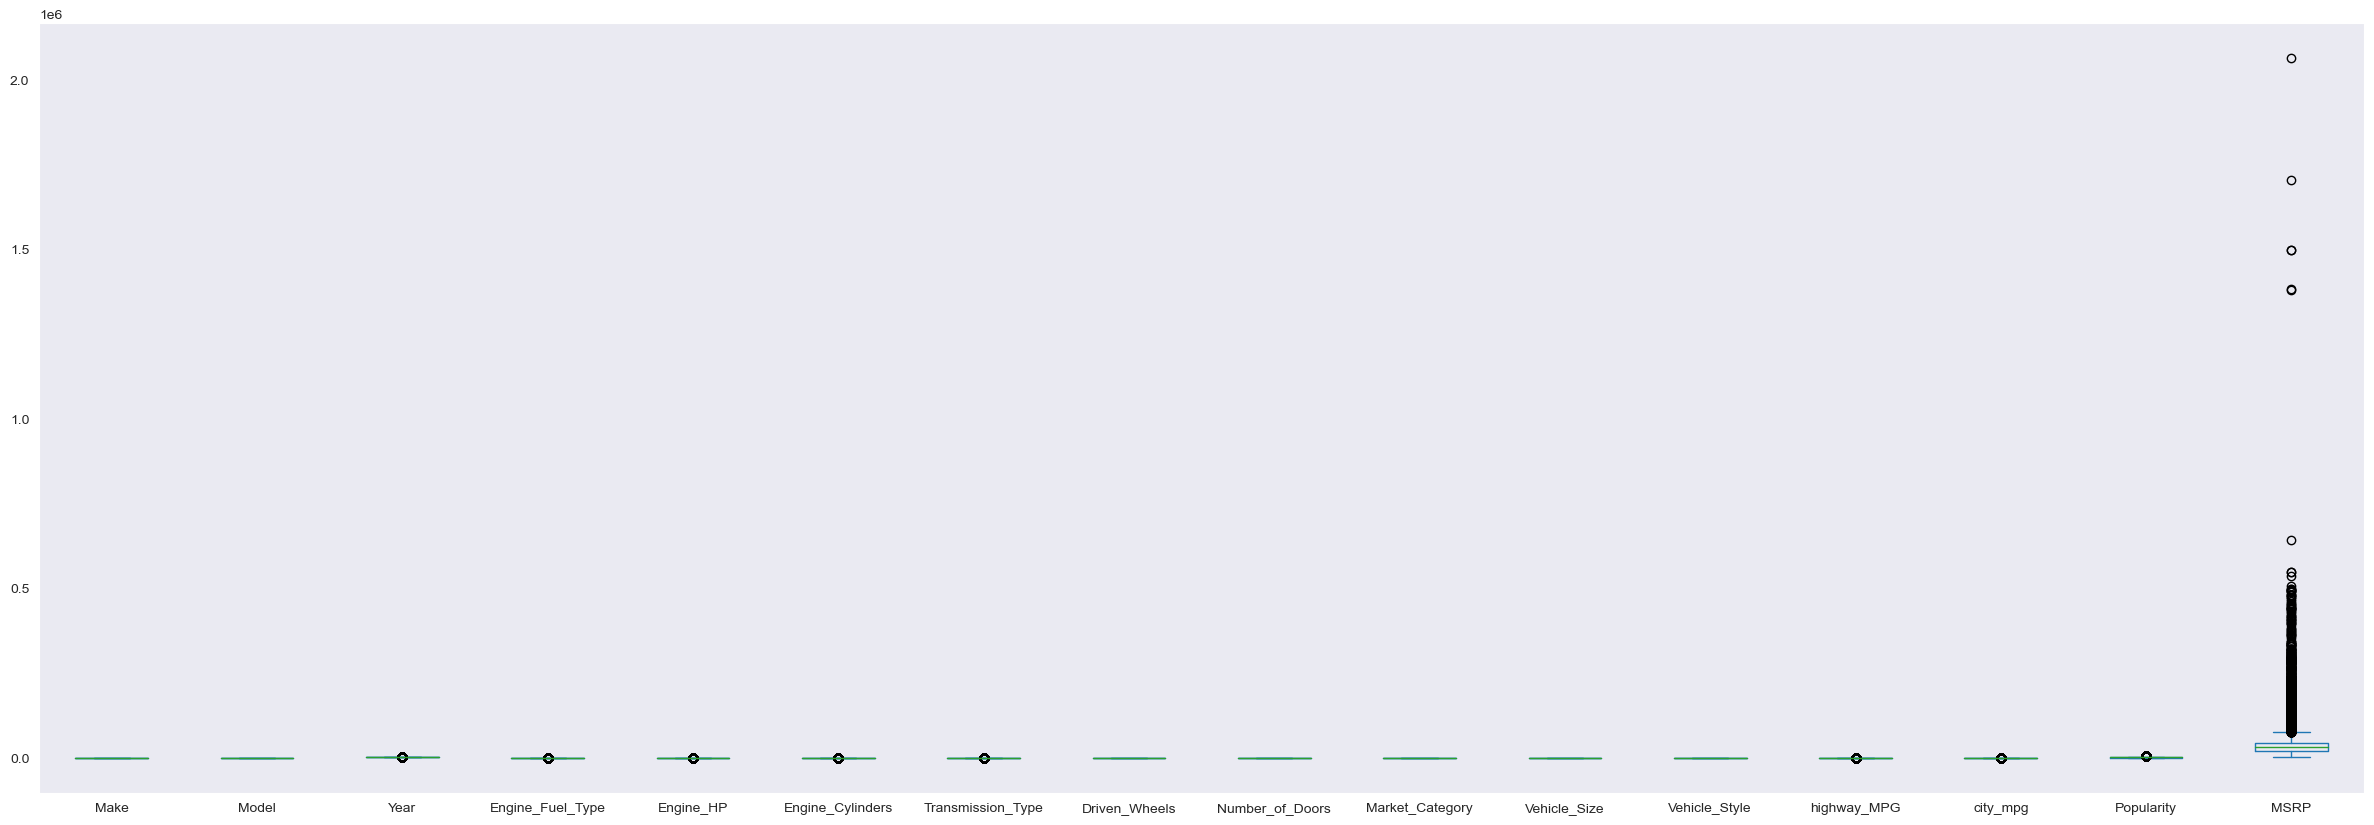

In [68]:
df.plot(kind = 'box', figsize = (30,10))

array([[<Axes: title={'center': 'Make'}>,
        <Axes: title={'center': 'Model'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Engine_Fuel_Type'}>],
       [<Axes: title={'center': 'Engine_HP'}>,
        <Axes: title={'center': 'Engine_Cylinders'}>,
        <Axes: title={'center': 'Transmission_Type'}>,
        <Axes: title={'center': 'Driven_Wheels'}>],
       [<Axes: title={'center': 'Number_of_Doors'}>,
        <Axes: title={'center': 'Market_Category'}>,
        <Axes: title={'center': 'Vehicle_Size'}>,
        <Axes: title={'center': 'Vehicle_Style'}>],
       [<Axes: title={'center': 'highway_MPG'}>,
        <Axes: title={'center': 'city_mpg'}>,
        <Axes: title={'center': 'Popularity'}>,
        <Axes: title={'center': 'MSRP'}>]], dtype=object)

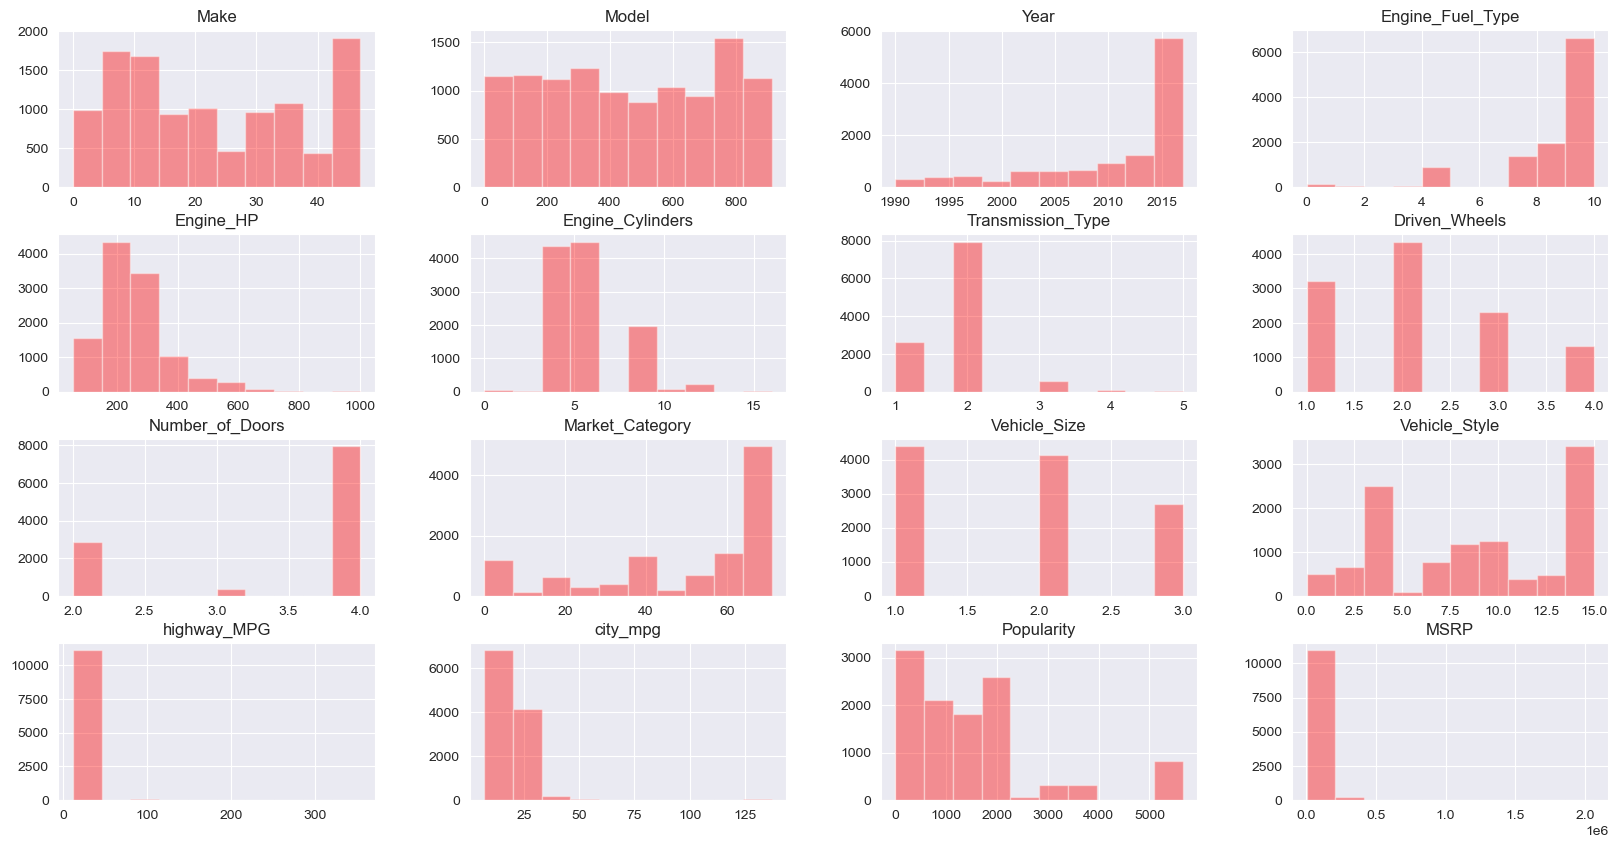

In [69]:
df.hist(figsize=(20,10), color = 'r', alpha = 0.4)

<Axes: >

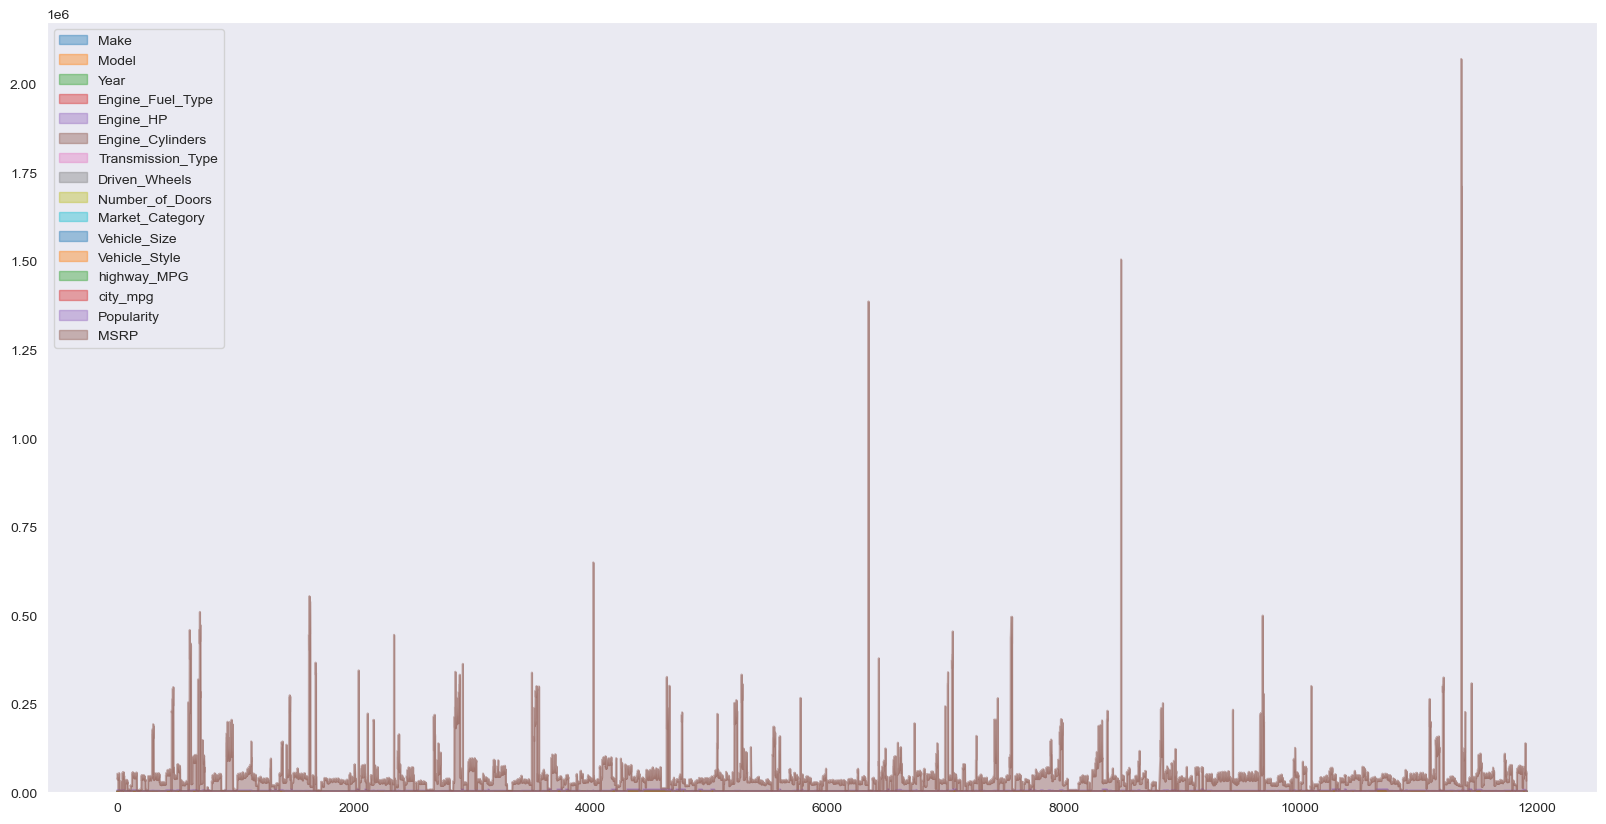

In [70]:
df.plot(kind = 'area', figsize = (20,10), alpha = 0.4, stacked = True)

<Axes: xlabel='Year', ylabel='Popularity'>

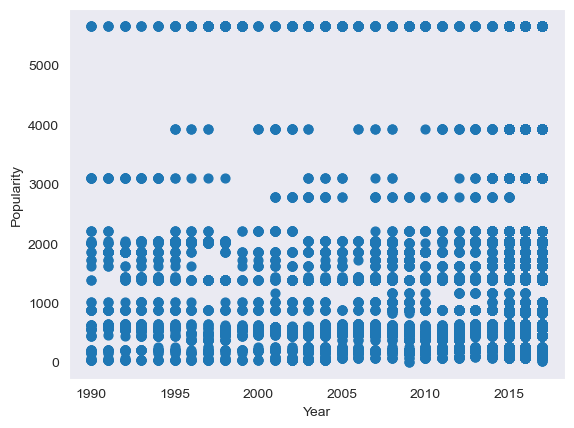

In [71]:
df.plot.scatter(x = 'Year', y = 'Popularity', s = 40)

<Axes: xlabel='Model', ylabel='Popularity'>

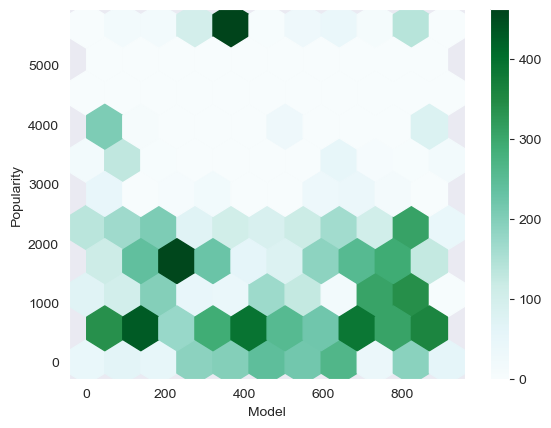

In [72]:
df.plot.hexbin(x = 'Model', y = 'Popularity', gridsize = 10)